# Multilayered perceptron (MLP)
### 1. MLP for classification

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset

In [12]:
df = pd.read_csv("Data/cardio_train.csv", sep = ";")
df.drop("id", axis = 1, inplace = True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Train|Test split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop("cardio", axis = 1), df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

MLP network

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [24]:
def MLP_model(layers):
    model = Sequential(name = "MLP_model")

    # input layer
    model.add(InputLayer(X_test.shape[1], name = "Input_layer"))
    
    # hidden layers
    for i, nodes in enumerate(layers):
        model.add(Dense(nodes, name = f"Hidden_layer_{i+1}", activation = "relu"))

    # output layer
    model.add(Dense(1, name = "Output_layer", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

In [38]:
def evaluate_model(layers):
    model = MLP_model(layers)
    model.fit(scaled_X_train, y_train, epochs = 25, validation_split = 0.2, verbose = 0)

    return pd.DataFrame(model.history.history)

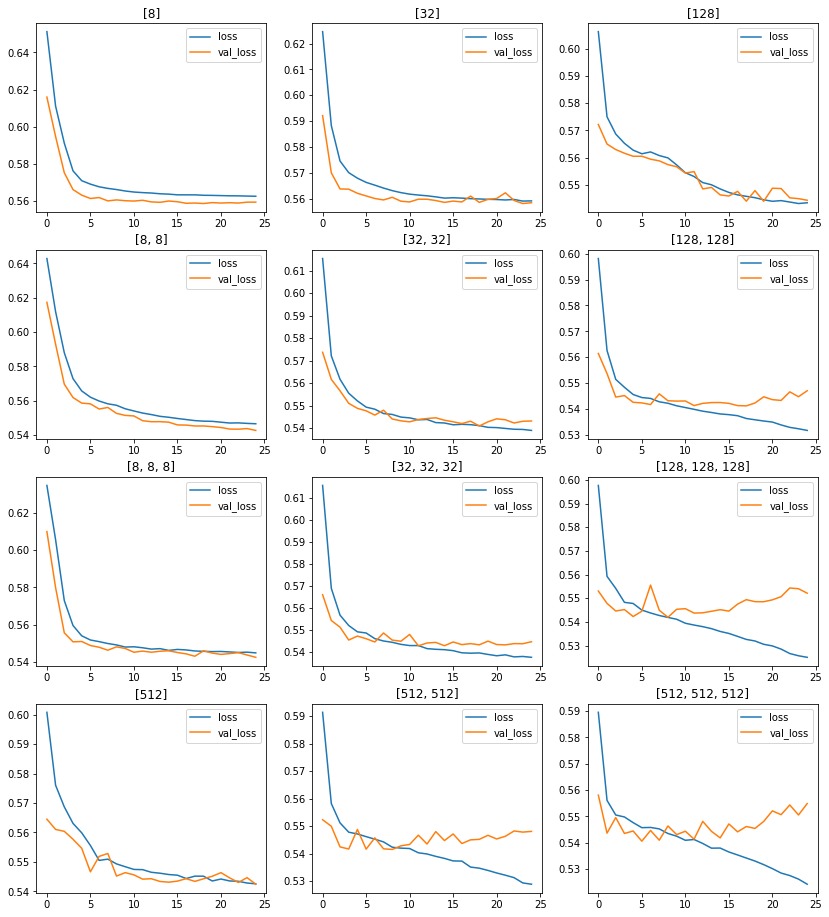

In [40]:
fig, axes = plt.subplots(4, 3, figsize = (14, 16))

for ax, nodes in zip(axes.flatten(), [[8], [32], [128], 
                                        [8, 8], [32, 32], [128, 128], 
                                        [8, 8, 8], [32, 32, 32], [128, 128, 128],
                                        [512], [512, 512], [512, 512, 512]]):
    test = evaluate_model(nodes)
    test.plot(ax = ax)
    ax.set_title(nodes)

In [52]:
model = MLP_model([32, 32])
model.fit(scaled_X_train, y_train, epochs = 10, verbose = 0)

              precision    recall  f1-score   support

           0       0.61      0.93      0.73     11506
           1       0.85      0.41      0.55     11594

    accuracy                           0.67     23100
   macro avg       0.73      0.67      0.64     23100
weighted avg       0.73      0.67      0.64     23100



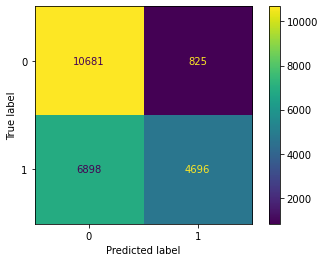

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

y_pred = model.predict(scaled_X_test)

y_pred = (y_pred > 0.8) * 1

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))